# Обробка та аналіз БМД

Лабораторна робота №5

Виконав студент групи БС-81

Лукашевич Максим

1. Обрати реальні дані з kaggle або сгенерувати випадкові дані, що містять розподіл деякої ознаки в двох групах.

In [7]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [39]:
table = pd.DataFrame({'num1':[5,13,25,28,310,54,2,99,50,100],
                      'num2':[11,88,1,0,58,89,38,150,200,10]},
                    index = ['Player1','Player2','Player3','Player4','Player5','Player6','Player7','Player8','Player9','Player0'])
table

,num1,num2
Player1,5,11
Player2,13,88
Player3,25,1
Player4,28,0
Player5,310,58
Player6,54,89
Player7,2,38
Player8,99,150
Player9,50,200
Player0,100,10


2. Побудувати графік, що відображає розподіл ознак в групах.

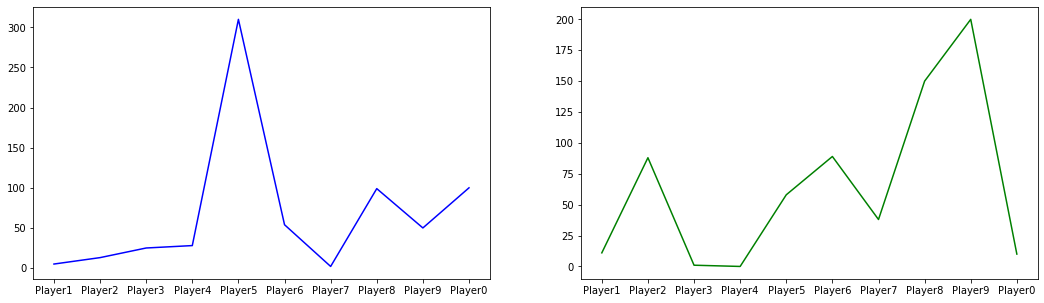

In [15]:
fig = plt.subplots(1,2,figsize = (18,5))
plt.subplot(1, 2, 1) 
plt.plot(table.index, table['num1'], 'b')

plt.subplot(1, 2, 2) 
plt.plot(table.index, table['num2'], 'g')

3. Написати функції, що оцінює зв'язок між ознакою та групою за критерієм Пірсона. Функція має оцінювати розбіжність на двох рівнях - 0,001 та 0,05, в залежністі від параметру significant_level, що передається в неї. Врахувати у функції випадок, що сума частот ознаки у групах може бути відмінною.

In [29]:
def pirs(table, sig):
    n = table.shape[0]
    if(sum(table["num1"]) != sum(table["num2"])):
        table["num1"] = [table["num1"][i] * 100 / sum(table["num1"]) for i in range(n)]
        
        table["num2"] = [table["num2"][i] * 100 / sum(table["num2"]) for i in range(n)]
    else:
        table['ni-ni^2'] = [(table["num1"][i] - table["num2"][i])**2 for i in range(n)]
        table["(ni-ni)^2/ni^2"] = [(table['ni-ni^2'][i] / table["num1"][i]) for i in range(n)]
        xi = sum(table["(ni-ni)^2/ni^2"])

        a = pd.read_excel("pirs.xlsx").iloc[n-1, 1 if(sig ==  0.01) else 2]
        
        if(xi > a):
            print("Cуттєва.")
        else:
            print("Не суттєва.")
            
pirs(table, 0.01)

Cуттєва.


In [30]:
pirs(table, 0.05)

Cуттєва.


4. Перевірити розбіжність на між групами на даних з п. 1. В результаті сформувати таблицю спряженості.



In [40]:
table.insert(2, "num1 %", table["num1"])
table.insert(3, "num2 %", table["num2"])
table

,num1,num2,num1 %,num2 %
Player1,5,11,5,11
Player2,13,88,13,88
Player3,25,1,25,1
Player4,28,0,28,0
Player5,310,58,310,58
Player6,54,89,54,89
Player7,2,38,2,38
Player8,99,150,99,150
Player9,50,200,50,200
Player0,100,10,100,10
